# Preliminary Stuff

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [2]:
data = np.loadtxt('datafile.txt')

# Part 1

Consider the distribution of our statistic $Y$. Suppose $Y$ has pdf $f(x)$, $X$ has pdf $g(x)$ and $T$ has pdf $h(x)$. Since $Y=X+T$, $f(x)$ is related to $g(x)$ and $h(x)$ through Meltin convolution:

\begin{align*}
    f(z) &= \int_{-\infty}^\infty g(x)h(z-x) dx\\
    &= \frac{1}{d}\int_{0}^d h(z-x) dx &\text{since $g(x)$ is uniform with pdf $1/d$ in the range $[0,d]$}\\
    &= \frac{1}{d} \times \begin{cases} 0 & z<0\\
    \int_0^z e^{-z}e^x dx & 0<z<d\\
    \int_0^d e^{-z}e^x dx & z>d
    \end{cases}
\end{align*}

This last line follows since the pdf $h(x)$ is defined as $e^{-x}$ for $x>0$ only. Evaluating each of these integrals yields

\begin{align*}
    f(z) &= \frac{1}{d} \times \begin{cases} 0 & z<0\\
     1-e^{-z} & 0<z<d\\
     e^{-z}(e^d-1) & z>d
    \end{cases}
\end{align*}



In [3]:
d_null = 5
d_alt = 4

def pdf(x,d):
    return (1/d)* np.piecewise(x, [x < 0, (x>=0)*(x<d), x >= d],
                        [lambda x:0, lambda x:1-np.exp(-x), lambda x:np.exp(-x)*(np.exp(d)-1) ])



Obtain PDFS

In [4]:
x = np.linspace(0,10,1000)
pdf_null = pdf(x, d_null)
pdf_alt = pdf(x, d_alt)

Format bins for data.

In [5]:
bins = np.linspace(0, 10, 40)
area_norm = 40*(bins[1]-bins[0])

Plot.

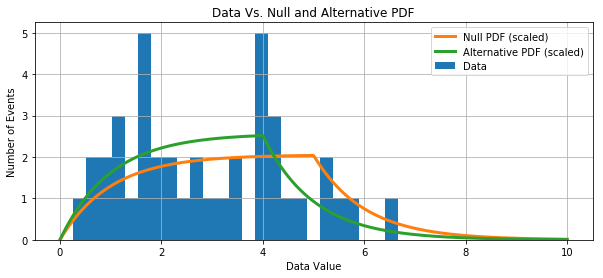

In [6]:
fig, ax = plt.subplots(figsize=(10,4))
ax.hist(data,bins=bins, label='Data')
ax.plot(x,pdf_null*area_norm, lw=3, label='Null PDF (scaled)')
ax.plot(x,pdf_alt*area_norm, lw=3, label='Alternative PDF (scaled)')
ax.set_xlabel('Data Value')
ax.set_ylabel('Number of Events')
ax.set_title('Data Vs. Null and Alternative PDF')
ax.grid()
ax.legend()
plt.show()

# Part 2

The test statistic is the sample mean.

In [7]:
print('The test statistic is {:.2f}'.format(data.mean()))

The test statistic is 2.90


# Part 3

$n$ is the number of events used when calculating the mean, $N$ is the total number of means calculated. We use $n=40$ because the test statistic we calculated from the data set comes from 40 data points:

In [8]:
n = 40
N = 10000

### Part 3.1 Get Random Events

This function computes the mean of $n$ random events $N$ times (stored in array of length $N$).

In [9]:
def compute_mean(d, n, N):
    return np.array([np.mean(np.random.exponential(scale=1.0, size=n)
               + np.random.uniform(low=0, high=d, size=n)) for i in range(N)])

Obtain both the null and alternative data, changing $d$ accordingly.

In [10]:
test_null = compute_mean(d_null, n, N)
test_alt = compute_mean(d_alt, n, N)
bins = np.arange(2.5,4.5,0.1)

### Part 3.2 Get PDFs

The central limit theorem says that the statistic

$$\bar{Y} = \sum_{i=1}^n Y_i $$

approaches a Gaussian distribution with $\mu_\bar{Y}=\mu_Y$ and $\sigma_{\bar{Y}}=\sigma_Y/\sqrt{n}$ for large $n$. We have

\begin{align*}
    E[Y] &= E[X]+E[T]\\
    &=\frac{d}{2}+1
\end{align*}

and

\begin{align*}
    E[Y^2] &= E[(X+T)^2]\\
    &=E[X^2]+E[T^2]+2E[X]E[T]\\
    &= \frac{d^2}{3}+2+d
\end{align*}

and thus

$$\mu_Y = E[Y] = \frac{d}{2}+1$$

and

$$\sigma_Y^2 = E[Y^2]-E[Y]^2 = \frac{d^2}{12}+1$$

Here we define the "central limit Gaussian" as a function of our parameter $d$ in the hypothesis pdf distributions.

In [11]:
def Gaussian(x, d, n):
    mu = d/2 + 1
    sig = np.sqrt((d**2 /12) +1)/np.sqrt(n)
    
    return 1/np.sqrt(2*np.pi*sig**2) * np.exp(-(x-mu)**2 / (2*sig**2))

Obtain the pdfs

In [12]:
x = np.linspace(2.5,4.5,1000)
gaus_null = Gaussian(x, d_null, n)
gaus_alt = Gaussian(x, d_alt, n)

### Part 3.3: Plot

Below is the plot of everything required.

In [13]:
area_norm = N*(bins[1]-bins[0])

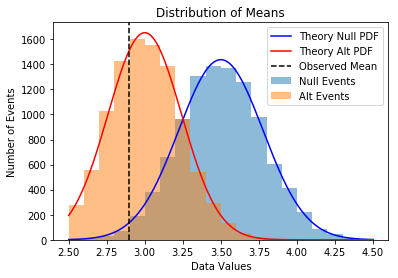

In [14]:
plt.hist(test_null, bins=bins, alpha=0.5, label='Null Events')
plt.hist(test_alt, bins=bins, alpha=0.5, label='Alt Events')
plt.plot(x, gaus_null*area_norm, color='b',label='Theory Null PDF')
plt.plot(x, gaus_alt*area_norm, color='red',label='Theory Alt PDF')
plt.axvline(data.mean(), color='k', ls='--', label='Observed Mean')
plt.xlabel('Data Values')
plt.ylabel('Number of Events')
plt.title('Distribution of Means')
plt.legend()
plt.show()

# Part 4

Since the alternative hypothesis pdf is to the left of the null hypothesis pdf, we choose the anolmalous region to be on the left side of the pdf. The p-value is thus given by

$$p=\int_{-\infty}^{M}G(x;d,n)dx $$

where $G$ is the normal distribution, $d$ specifies the parameter $d$ in the uniform PDF, and $n$ specifies the number of points used when calculating means of our samples. $M$ is the mean of the data set.

In [15]:
p_value = quad(Gaussian, -np.inf, data.mean(), args=(d_null, n))[0]
print('P value is {:.5f}'.format(p_value))

P value is 0.01530


Since the p-value is less than 0.05, the null hypothesis is rejected at the 95% confidence level.

# Part 5

The posterior odds are given by

$$ \text{Posterior Odds} = \frac{P(H_0|x)}{P(H_1|x)} = \frac{P(x|H_0)}{P(x|H_1)}\frac{P(H_0)}{P(H_1)} = \frac{P(x|H_0)}{P(x|H_1)}$$

since the two hypotheses are deemed equally likely before measurement. The probability of the null hypothesis, given the data measured, is

$$P(H_0|x)=\frac{1}{1+1/(\text{Posterior Odds})}$$

Below is some savy code to determine the ratio of entries that have a test statistic within 0.1 of the data test statistic value. Recall that we are taking the ratio of entries of the blue histogram to the orange histogram in the dotted region in the plot below. Since these data points were computed using

* (i) random generators 
* (ii) we are taking an interval around the desired location

this calculation of the posterior probability is both 

* (i) a Monte Carlo calculation
* (ii) an approximation.

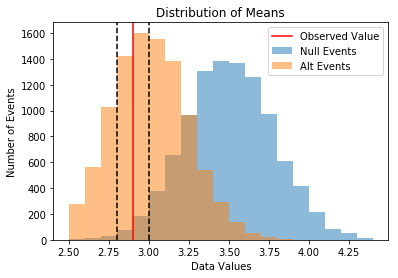

In [16]:
plt.hist(test_null, bins=bins, alpha=0.5, label='Null Events')
plt.hist(test_alt, bins=bins, alpha=0.5, label='Alt Events')
plt.axvline(data.mean()+0.1, color='k', ls='--')
plt.axvline(data.mean()-0.1, color='k', ls='--')
plt.axvline(data.mean(), color='r', label='Observed Value')
plt.xlabel('Data Values')
plt.ylabel('Number of Events')
plt.title('Distribution of Means')
plt.legend()
plt.show()

**Note**: The black dotted lines are the number of toy samples that have a test statistic within 0.1 of the data test statistic value.

Here is the code to calculate the posterior odds and then the probability that the null hypothesis is true.

In [17]:
post_odds = np.count_nonzero((np.abs(test_null-data.mean()))<=0.1) \
            / np.count_nonzero((np.abs(test_alt-data.mean()))<=0.1)
post_prob = 1/(1+1/post_odds)
print('Probability that null hypothesis is true (posterior probability) is {:.5f}'.format(post_prob))

Probability that null hypothesis is true (posterior probability) is 0.07943


# Part 6

Now we are using the ratio of the blue point to the orange point on the approximate pdfs shown below to calculate the posterior odds. Since the pdfs were computed using the central limit theorem, they are an approximation; since $n=40$ they are likely a good approximation.

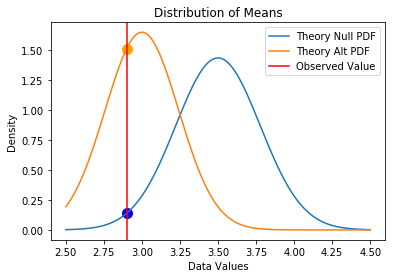

In [18]:
plt.plot(x, gaus_null, label='Theory Null PDF')
plt.plot(x, gaus_alt, label='Theory Alt PDF')
plt.scatter(data.mean(), Gaussian(data.mean(), d_null, n), color='b', s=100)
plt.scatter(data.mean(), Gaussian(data.mean(), d_alt, n), color='orange', s=100)
plt.axvline(data.mean(), color='r', label='Observed Value')
plt.xlabel('Data Values')
plt.ylabel('Density')
plt.title('Distribution of Means')
plt.legend()
plt.show()

Using the approximate pdfs derived we have

In [19]:
post_odds = Gaussian(data.mean(), d_null, n)/Gaussian(data.mean(), d_alt, n)
post_prob = 1/(1+1/post_odds)
print('Probability that null hypothesis is true (posterior probability) is {:.5f}'.format(post_prob))

Probability that null hypothesis is true (posterior probability) is 0.08387
